#Predicting wine quality

###The goal of this notebook is to predict the wine quality (scale) given some chemical properties of the substance.

First, let's import some libraries that we'll need

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Take a look at our data

In [163]:
data = pd.read_csv('wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


I have no idea why the author added an Id column at the end. Drop it anyways.

In [164]:
data = data.drop('Id', axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Now split our data into quality column and everything else (data based on which we will make predictions about quality)

In [165]:
x = data.drop('quality', axis=1).values
y = data['quality'].values

###Let's have a look at our quality distribution

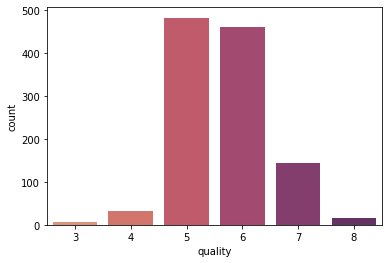

In [166]:
sns.countplot(x='quality', data=data, palette='flare')
plt.show()

The data is unbalanced, so I will use SMOTE (https://arxiv.org/pdf/1106.1813.pdf) to fix it

In [167]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_SMOTE, y_SMOTE = sm.fit_resample(x, y)

###Now we can use sklearn to finally train a model

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_SMOTE, y_SMOTE, test_size=0.1)

rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('Accuracy: ', "%.1f"%(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy:  84.8%
